In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('white')
sns.color_palette('dark')

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


##Import Data

In [39]:
unames=['user_id','gender', 'age', 'occupation', 'zip']
users=pd.read_table('users.dat', sep='::', header=None, names=unames)

In [40]:
users.tail()

,user_id,gender,age,occupation,zip
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [41]:
rnames=['user_id', 'movie_id', 'rating', 'timestamp']
ratings=pd.read_table('ratings.dat', sep='::', header=None, names=rnames)

In [42]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [43]:
mnames=['movie_id', 'title', 'genres']
movies=pd.read_table('movies.dat', sep='::', header=None, names=mnames)

In [44]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


##Merge Datasets

In [45]:
data=pd.merge(pd.merge(ratings, users), movies)

In [46]:
data.tail(500)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
999709,4286,3641,1,965280200,M,35,17,11554,"Woman of Paris, A (1923)",Drama
999710,4523,3641,2,965165172,M,18,2,55304,"Woman of Paris, A (1923)",Drama
999711,1470,1115,1,974915361,M,18,4,94118,Sleepover (1995),Comedy|Drama
999712,1470,1118,2,974839413,M,18,4,94118,Tashunga (1995),Adventure|Western
999713,1470,601,3,974839011,M,18,4,94118,"Wooden Man's Bride, The (Wu Kui) (1994)",Drama
999714,1470,3828,1,974838711,M,18,4,94118,Better Living (1998),Comedy
999715,3885,3828,4,967649805,M,25,12,92728,Better Living (1998),Comedy
999716,1470,1142,1,974836825,M,18,4,94118,Get Over It (1996),Drama
999717,3598,1142,1,966627049,M,56,1,90210,Get Over It (1996),Drama
999718,1470,1145,2,974915518,M,18,4,94118,Snowriders (1996),Documentary


In [48]:
most_rated = data.groupby('title').size()
most_rated=pd.DataFrame(most_rated)
most_rated.head()

,0
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199


In [49]:
most_rated.columns=['Ratings_Count']

In [50]:
most_rated[most_rated.Ratings_Count>=200].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426 entries, 'burbs, The (1989) to eXistenZ (1999)
Data columns (total 1 columns):
Ratings_Count    1426 non-null int64
dtypes: int64(1)
memory usage: 22.3+ KB


In [51]:
%matplotlib inline

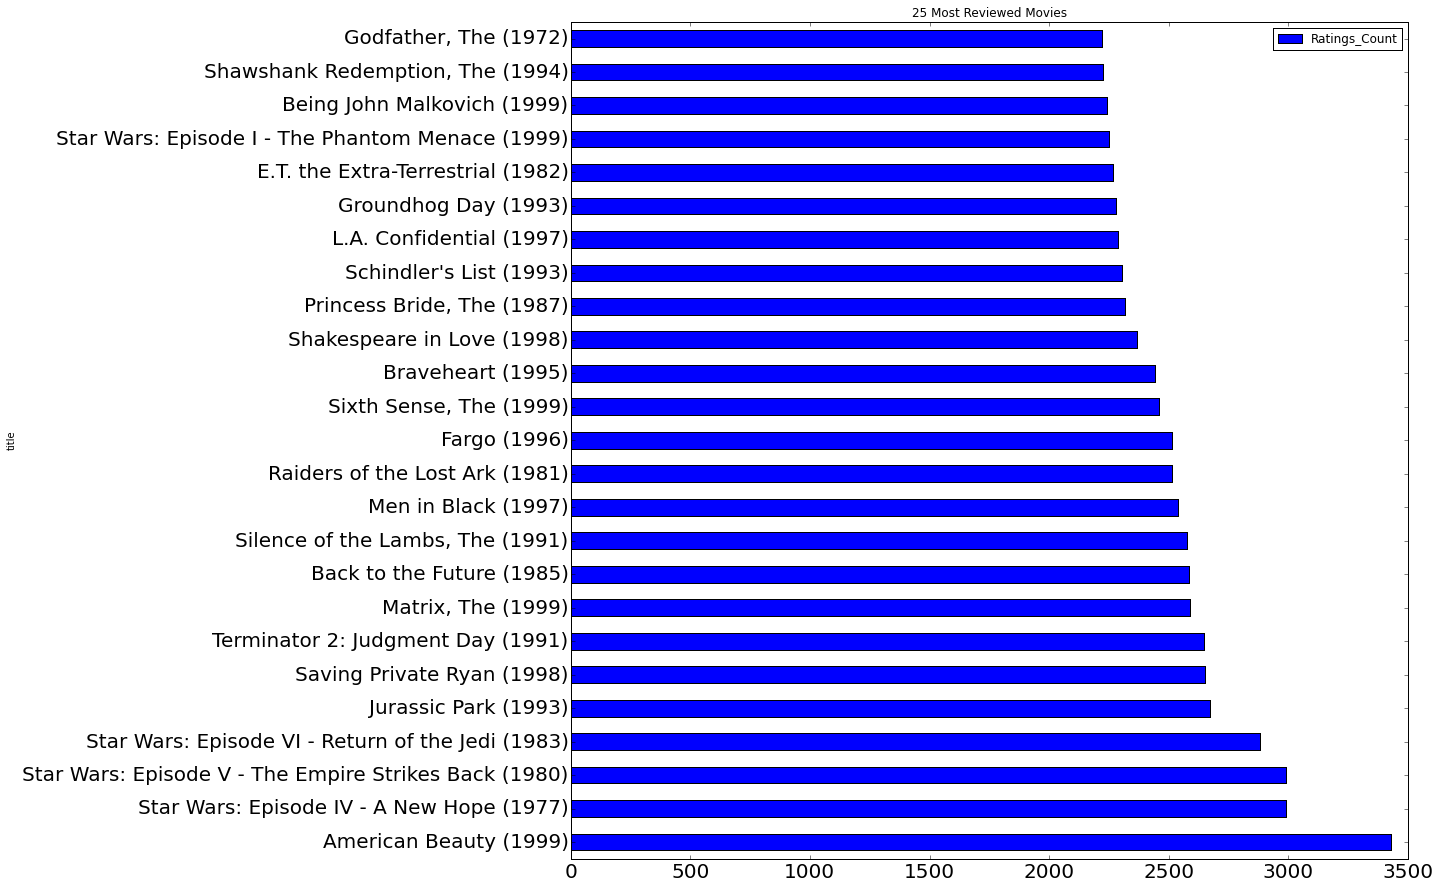

In [65]:
most_rated.sort_index(by='Ratings_Count', ascending=False)[:25].plot(kind='barh',figsize=(15,15), fontsize=20 , sort_columns=False, title="25 Most Reviewed Movies")

In [66]:
most_rated.reset_index(level=0, inplace=True)
most_rated.sort_index(by='Ratings_Count', ascending=False)[:20]

,title,Ratings_Count
127,American Beauty (1999),3428
3153,Star Wars: Episode IV - A New Hope (1977),2991
3154,Star Wars: Episode V - The Empire Strikes Back...,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883
1789,Jurassic Park (1993),2672
2894,Saving Private Ryan (1998),2653
3293,Terminator 2: Judgment Day (1991),2649
2112,"Matrix, The (1999)",2590
258,Back to the Future (1985),2583
2990,"Silence of the Lambs, The (1991)",2578


In [20]:
data['year']=data.title.str.findall('\(([0-9]+)\)')

In [21]:
data.sort_index(by="year", ascending=False)[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
274231,2872,3744,4,972422623,M,25,20,94014,Shaft (2000),Action|Crime,[2000]
274233,2890,3744,3,972018397,M,35,7,90069,Shaft (2000),Action|Crime,[2000]
274234,2894,3744,5,971987692,M,18,4,44130,Shaft (2000),Action|Crime,[2000]
274235,2909,3744,5,971977932,M,25,7,43228,Shaft (2000),Action|Crime,[2000]
274236,2944,3744,3,1011209006,F,18,4,48104,Shaft (2000),Action|Crime,[2000]
274237,2952,3744,3,971213561,M,25,4,06511,Shaft (2000),Action|Crime,[2000]
274238,2962,3744,3,976817404,M,35,3,94109,Shaft (2000),Action|Crime,[2000]
274239,2967,3744,1,971112587,M,25,0,94110,Shaft (2000),Action|Crime,[2000]
274240,2980,3744,2,983052333,M,45,7,91766,Shaft (2000),Action|Crime,[2000]
274241,2986,3744,2,979195169,M,25,4,24060,Shaft (2000),Action|Crime,[2000]


In [67]:
print data.info()
data=pd.merge(data, most_rated)
enough_data=data[data.Ratings_Count>=200]
print enough_data.info()
enough_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 855730 entries, 0 to 985625
Data columns (total 11 columns):
user_id          855730 non-null int64
movie_id         855730 non-null int64
rating           855730 non-null int64
timestamp        855730 non-null int64
gender           855730 non-null object
age              855730 non-null int64
occupation       855730 non-null int64
zip              855730 non-null object
title            855730 non-null

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,Ratings_Count
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1725
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1725
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1725
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1725
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1725


In [68]:
average_rating_bymovie=pd.DataFrame(enough_data.groupby('title')['rating'].mean())
average_rating_bymovie.sort_index(by='rating', ascending=False)[:25]

,rating
title,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510
"Shawshank Redemption, The (1994)",4.554558
"Godfather, The (1972)",4.524966
"Close Shave, A (1995)",4.520548
"Usual Suspects, The (1995)",4.517106
Schindler's List (1993),4.510417
"Wrong Trousers, The (1993)",4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489
Raiders of the Lost Ark (1981),4.477725


In [69]:
average_rating_bymovie.columns=['average_rating']

In [70]:
average_rating_bymovie.reset_index(level=0, inplace=True)

In [71]:
average_rating_bymovie.sort_index(by='average_rating', ascending=False).head(50)

,title,average_rating
1121,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510
1136,"Shawshank Redemption, The (1994)",4.554558
529,"Godfather, The (1972)",4.524966
274,"Close Shave, A (1995)",4.520548
1347,"Usual Suspects, The (1995)",4.517106
1106,Schindler's List (1993),4.510417
1412,"Wrong Trousers, The (1993)",4.507937
1244,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489
1016,Raiders of the Lost Ark (1981),4.477725
1029,Rear Window (1954),4.476190


In [72]:
enough_data=pd.merge(enough_data,average_rating_bymovie)
enough_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,Ratings_Count,average_rating
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725


In [73]:
rating_sd_bymovie=pd.DataFrame(enough_data.groupby('title')['rating'].std())
rating_sd_bymovie.head()

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


In [74]:
rating_sd_bymovie.reset_index(level=0, inplace=True)
rating_sd_bymovie.sort_index(by='rating', ascending=False)[:20]

,title,rating
974,Plan 9 from Outer Space (1958),1.455998
1274,"Texas Chainsaw Massacre, The (1974)",1.332448
388,Dumb & Dumber (1994),1.321333
168,"Blair Witch Project, The (1999)",1.316368
879,Natural Born Killers (1994),1.307198
637,Idle Hands (1999),1.298439
1324,"Transformers: The Movie, The (1986)",1.292917
1353,Very Bad Things (1998),1.280074
1263,Tank Girl (1995),1.277695
595,Hellraiser: Bloodline (1996),1.271939


In [75]:
rating_sd_bymovie.columns=['title', 'sd']
rating_sd_bymovie.head()

,title,sd
0,"'burbs, The (1989)",1.107760
1,10 Things I Hate About You (1999),0.989815
2,101 Dalmatians (1961),0.982103
3,101 Dalmatians (1996),1.098717
4,12 Angry Men (1957),0.812731


In [76]:
final_dataset=pd.merge(enough_data, rating_sd_bymovie)
print final_dataset.info()
final_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855730 entries, 0 to 855729
Data columns (total 13 columns):
user_id           855730 non-null int64
movie_id          855730 non-null int64
rating            855730 non-null int64
timestamp         855730 non-null int64
gender            855730 non-null object
age               855730 non-null int64
occupation        855730 non-null int64
zip               855730 non-null object
title             855730 non-null object
genres            855730 non-null object
Ratings_Count     855730 non-null int64
average_rating    855730 non-null float64
sd                855730 non-null float64
dtypes: float64(2), int64(7), object(4)
memory usage: 91.4+ MB
None


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,Ratings_Count,average_rating,sd
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725,0.789524
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725,0.789524
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725,0.789524
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725,0.789524
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725,0.789524


#Now it's your turn! Fill out a survey. 
#Rank movies you've watched between 1 and 5.
#Rank movies you haven't watched 0.

In [81]:
my_reviews=pd.read_csv('my_movie_reviews.csv')
my_reviews.head()

,original_index,title,my_rating
0,1121,Seven Samurai (The Magnificent Seven) (Shichin...,0
1,1136,"Shawshank Redemption, The (1994)",5
2,529,"Godfather, The (1972)",5
3,274,"Close Shave, A (1995)",0
4,1347,"Usual Suspects, The (1995)",0


#Split you're data into movies watched and movies not watched.

In [262]:
havent_watched=my_reviews[my_reviews.my_rating==0]
have_watched=my_reviews[my_reviews.my_rating!=0]
havent_watched.head()
have_watched.head()

,original_index,title,my_rating
1,1136,"Shawshank Redemption, The (1994)",5
2,529,"Godfather, The (1972)",5
8,1016,Raiders of the Lost Ark (1981),4
11,1221,Star Wars: Episode IV - A New Hope (1977),5
13,379,Dr. Strangelove or: How I Learned to Stop Worr...,4


In [263]:
have_watched.info()
havent_watched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 46
Data columns (total 3 columns):
original_index    15 non-null int64
title             15 non-null object
my_rating         15 non-null int64
dtypes: int64(2), object(1)
memory usage: 480.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 49
Data columns (total 3 columns):
original_index    35 non-null int64
title             35 non-null object
my_rating         35 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [267]:
havent_watched['times_mathced_with_you']=15
havent_watched.head()

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,original_index,title,my_rating,times_matched_with_you
0,1121,Seven Samurai (The Magnificent Seven) (Shichin...,0,15
3,274,"Close Shave, A (1995)",0,15
4,1347,"Usual Suspects, The (1995)",0,15
5,1106,Schindler's List (1993),0,15
6,1412,"Wrong Trousers, The (1993)",0,15


In [268]:
havent_watched['age']=25
havent_watched['occupation']=12

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [273]:
havent_watched=havent_watched.drop('original_index', axis=1)

In [274]:
havent_watched.head()

,title,my_rating,times_matched_with_you,age,occupation
0,Seven Samurai (The Magnificent Seven) (Shichin...,0,15,25,12
3,"Close Shave, A (1995)",0,15,25,12
4,"Usual Suspects, The (1995)",0,15,25,12
5,Schindler's List (1993),0,15,25,12
6,"Wrong Trousers, The (1993)",0,15,25,12


#Take the 500 users most similar to you.
#(Based on number of matching reviews.)

In retrospect, this project would have been vastly improved using collaborative filtering through unsupervised clustering techniques.

In [275]:
print final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855730 entries, 0 to 855729
Data columns (total 13 columns):
user_id           855730 non-null int64
movie_id          855730 non-null int64
rating            855730 non-null int64
timestamp         855730 non-null int64
gender            855730 non-null object
age               855730 non-null int64
occupation        855730 non-null int64
zip               855730 non-null object
title             855730 non-null object
genres            855730 non-null object
Ratings_Count     855730 non-null int64
average_rating    855730 non-null float64
sd                855730 non-null float64
dtypes: float64(2), int64(7), object(4)
memory usage: 91.4+ MB
None


In [276]:
#All matching reviews
matching_reviews=pd.merge(have_watched, final_dataset)
print matching_reviews.info()
matching_reviews.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32182 entries, 0 to 32181
Data columns (total 15 columns):
original_index    32182 non-null int64
title             32182 non-null object
my_rating         32182 non-null int64
user_id           32182 non-null int64
movie_id          32182 non-null int64
rating            32182 non-null int64
timestamp         32182 non-null int64
gender            32182 non-null object
age               32182 non-null int64
occupation        32182 non-null int64
zip               32182 non-null object
genres            32182 non-null object
Ratings_Count     32182 non-null int64
average_rating    32182 non-null float64
sd                32182 non-null float64
dtypes: float64(2), int64(9), object(4)
memory usage: 3.9+ MB
None


,original_index,title,my_rating,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,genres,Ratings_Count,average_rating,sd
32177,998,"Princess Bride, The (1987)",5,6023,1197,5,956751490,M,25,0,43213,Action|Adventure|Comedy|Romance,2318,4.30371,0.85004
32178,998,"Princess Bride, The (1987)",5,6024,1197,5,956749603,M,25,12,53705,Action|Adventure|Comedy|Romance,2318,4.30371,0.85004
32179,998,"Princess Bride, The (1987)",5,6032,1197,3,956716969,M,45,7,55108,Action|Adventure|Comedy|Romance,2318,4.30371,0.85004
32180,998,"Princess Bride, The (1987)",5,6036,1197,5,956712367,F,25,15,32603,Action|Adventure|Comedy|Romance,2318,4.30371,0.85004
32181,998,"Princess Bride, The (1987)",5,6039,1197,4,956705416,F,45,0,01060,Action|Adventure|Comedy|Romance,2318,4.30371,0.85004


In [277]:
most_similar=matching_reviews.groupby('user_id').size()
most_similar=pd.DataFrame(most_similar)
most_similar.columns=['times_matched_with_you']
most_similar.sort_index(by='times_matched_with_you', ascending=False)[:20]

,times_matched_with_you
user_id,
533,14
4277,14
4543,14
411,14
4510,14
424,14
4448,14
442,14
1694,14


In [278]:
most_similar.reset_index(level=0, inplace=True)
print most_similar.info()
most_similar.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5775 entries, 0 to 5774
Data columns (total 2 columns):
user_id                   5775 non-null int64
times_matched_with_you    5775 non-null int64
dtypes: int64(2)
memory usage: 135.4 KB
None


,user_id,times_matched_with_you
0,1,5
1,2,7
2,3,6
3,4,3
4,5,6


In [279]:
training_data=pd.merge(most_similar,final_dataset)
print training_data.info()
training_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846053 entries, 0 to 846052
Data columns (total 14 columns):
user_id                   846053 non-null int64
times_matched_with_you    846053 non-null int64
movie_id                  846053 non-null int64
rating                    846053 non-null int64
timestamp                 846053 non-null int64
gender                    846053 non-null object
age                       846053 non-null int64
occupation                846053 non-null int64
zip                       846053 non-null object
title                     846053 non-null object
genres                    846053 non-null object
Ratings_Count             846053 non-null int64
average_rating            846053 non-null float64
sd                        846053 non-null float64
dtypes: float64(2), int64(8), object(4)
memory usage: 96.8+ MB
None


,user_id,times_matched_with_you,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,Ratings_Count,average_rating,sd
0,1,5,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1725,4.390725,0.789524
1,1,5,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,525,3.464762,1.023202
2,1,5,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,636,4.154088,0.873854
3,1,5,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,1315,3.863878,0.895887
4,1,5,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,1703,3.854375,0.879284


In [ ]:
#Previous implementation...merge was cleaner and gave additional parameter
#matching_user_list=most_similar.sort_index(by='times_matched_with_you', ascending=False)[:500].index.tolist()

In [ ]:
#Generate a list of the top 500 (arbitrary) matching users.

In [ ]:
#Extract all reviews from these matching users.
# print final_dataset.info()
# testing_dataset=final_dataset[final_dataset.user_id.isin(matching_user_list)]
# print testing_dataset.info()
# trial=pd.merge(most_similar,final_dataset)
# print trial.info()
# trial.head()

In [106]:
from patsy import dmatrices

#Now for some actual regression!

#Train-Validate

In [233]:
# # y_train, x_train = dmatrices('rating ~ gender + age + occupation + title + times_matched_with_you', data=training_data, return_type='dataframe')
# y_train=training_data.groupby('titlerating
# x_train=training_data.groupby('title')[['times_matched_with_you', 'occupation','age']]
# x_test=havent_watched[['times_matched_with_you','occupation','age','title']]

In [244]:
havent_watched.head(10)

,original_index,title,my_rating,times_matched_with_you,gender,age,occupation
0,1121,Seven Samurai (The Magnificent Seven) (Shichin...,0,15,M,25,12
3,274,"Close Shave, A (1995)",0,15,M,25,12
4,1347,"Usual Suspects, The (1995)",0,15,M,25,12
5,1106,Schindler's List (1993),0,15,M,25,12
6,1412,"Wrong Trousers, The (1993)",0,15,M,25,12
7,1244,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),0,15,M,25,12
9,1029,Rear Window (1954),0,15,M,25,12
10,947,Paths of Glory (1957),0,15,M,25,12
12,1283,"Third Man, The (1949)",0,15,M,25,12
14,1363,Wallace & Gromit: The Best of Aardman Animatio...,0,15,M,25,12


In [249]:
print training_data.info()
training_data.sort_index(by='title').head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846053 entries, 0 to 846052
Data columns (total 14 columns):
user_id                   846053 non-null int64
times_matched_with_you    846053 non-null int64
movie_id                  846053 non-null int64
rating                    846053 non-null int64
timestamp                 846053 non-null int64
gender                    846053 non-null object
age                       846053 non-null int64
occupation                846053 non-null int64
zip                       846053 non-null object
title                     846053 non-null object
genres                    846053 non-null object
Ratings_Count             846053 non-null int64
average_rating            846053 non-null float64
sd                        846053 non-null float64
dtypes: float64(2), int64(8), object(4)
memory usage: 96.8+ MB
None


,user_id,times_matched_with_you,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,Ratings_Count,average_rating,sd
127228,963,13,2072,2,975207784,M,25,0,48197,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
695911,4957,11,2072,3,962908816,M,25,2,48197,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
419179,3053,7,2072,1,970169396,F,25,3,55102,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
302500,2106,9,2072,1,975440795,F,18,20,495321,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
579730,4107,12,2072,3,978816477,F,25,0,23221,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
278000,1958,10,2072,3,974688540,F,25,1,17055,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
784972,5614,13,2072,3,959205575,M,25,0,12833,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
659644,4675,7,2072,4,963903018,F,18,4,27514,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
60370,475,6,2072,3,976221901,F,25,2,55421,"'burbs, The (1989)",Comedy,303,2.910891,1.10776
69915,543,10,2072,4,976215460,M,25,5,55057,"'burbs, The (1989)",Comedy,303,2.910891,1.10776


In [323]:
import pandas as pd
import statsmodels.api as sm

x_test=havent_watched[['times_matched_with_you','occupation','age','title']]

your_recommendations={}

count=0
for movie in training_data.title.unique():
    tempdf = training_data[training_data.title == movie]
    x = tempdf[['age','occupation','times_matched_with_you']]
    y = tempdf['rating']
    model = sm.OLS(y, x)
    results = model.fit()
    if any(have_watched.title.str.contains(movie)):
        continue
    else:
        your_recommendations[movie]=results.predict([25, 12, 15])[0]
    count+=1
    if count==1000:
        break
   
    #x_test[x_test.title==movie][['age','occupation','times_matched_with_you']]) 
    
    
#     print results.summary()
#     havent_watched.loc[0,'my_rating'] = 0.5
# #     havent_watched[havent_watched.title==movie]['t']=0.5
# #     results.predict(x_test[x_test.title==movie][['times_matched_with_you','occupation','age']]) 

In [316]:
your_recommendations.items()

[('Iron Giant, The (1999)', 5.0711029193417136),
 ('Birdcage, The (1996)', 4.1459811921051042),
 ('Doctor Dolittle (1967)', 3.4694307982174148),
 ('Arachnophobia (1990)', 3.683466760801871),
 ('Face/Off (1997)', 4.2209006499557997),
 ('Devil in a Blue Dress (1995)', 3.8233491821714076),
 ('Drop Dead Gorgeous (1999)', 3.8862134209324628),
 ('Robin Hood (1973)', 4.8837557563215324),
 ('In the Line of Fire (1993)', 4.5286962233521741),
 ("Muriel's Wedding (1994)", 4.3300035344628212),
 ('Encino Man (1992)', 3.2211394802031279),
 ('Mortal Kombat (1995)', 3.4605932190928059),
 ('Very Bad Things (1998)', 3.3462217471502149),
 ("'burbs, The (1989)", 3.4726152093939318),
 ('Beavis and Butt-head Do America (1996)', 4.0712476782984037),
 ('Producers, The (1968)', 4.5425278979135966),
 ('Rear Window (1954)', 5.2125144429452153),
 ('American Tail, An (1986)', 4.3310931167454214),
 ('Exorcist, The (1973)', 4.8811310054689798),
 ('Pushing Tin (1999)', 3.4858718627483345),
 ('Loaded Weapon 1 (1993)',

#Sort these and generate a list of recommendations!

In [317]:
import operator
top_recommendations = sorted(your_recommendations.items(), key=operator.itemgetter(1), reverse=True)

In [318]:
recommendations_df=pd.DataFrame(your_recommendations.items(), columns=['title', 'predicted_rating'])
recommendations_df.sort_index(by='predicted_rating', ascending=False).head(50)

,title,predicted_rating
679,"Shawshank Redemption, The (1994)",5.849671
756,Star Wars: Episode IV - A New Hope (1977),5.842189
638,Raiders of the Lost Ark (1981),5.829463
32,"Godfather, The (1972)",5.783090
347,Star Wars: Episode V - The Empire Strikes Back...,5.750379
460,"Usual Suspects, The (1995)",5.735990
814,Pulp Fiction (1994),5.717396
778,"Matrix, The (1999)",5.685919
438,American Beauty (1999),5.677653
447,Schindler's List (1993),5.663096


In [319]:
recommendations_df=recommendations_df.set_index('title')

AttributeError: 'XAxis' object has no attribute 'title'

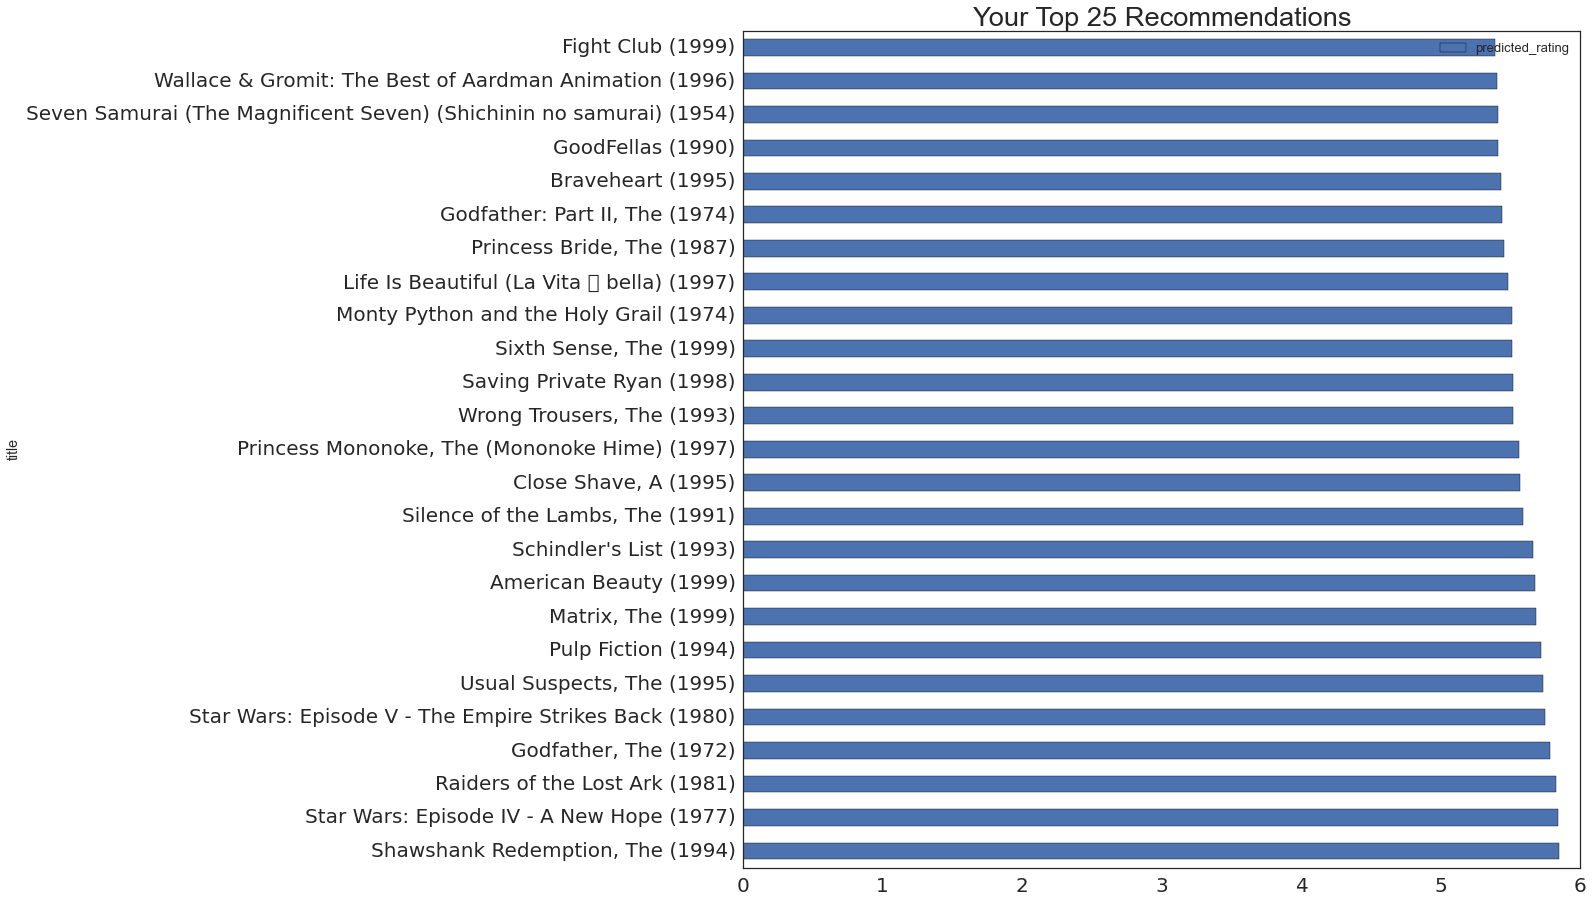

In [341]:
ax = recommendations_df.sort_index(by='predicted_rating', ascending=False).head(25).plot(kind='barh',figsize=(15,15), fontsize=20 , sort_columns=False, title="Your Top 25 Recommendations")
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
#ax.title('Your Top 25 Recommendations', fontsize=20)
ax.title.set_fontsize(ax.title.get_fontsize()*1.75)
#ax.xaxis.title.set_fontsize(14)
#ax.yaxis.title.set_fontsize(14)

# ax.title.set_fontproperties(weight='bold')

#NEXT STEPS: 
* Map the range of the regression model to be between 0 and 5
* Refine model using more advanced techniques
* SurveyMonkey/ Online Platform + Automation